# 42576 From analytics to action, Spring 2025

Rigshospitalet case presentation from group 7:

- Fie Christina Møller (s205291)
- Gonçalo Alexandre Baeta Rebelo de Sousa (s232656)
- Inês Da Fonseca Tacanho (s232669)
- Margarida Neto Iria Varanda Gonçalves (s233528)
- Nikolai Outzen Wegge-Berg (s195387)
- Raquel Moleiro Marques (s243636)

### Imports

In [2]:
import re
import folium
import textwrap
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import branca.colormap as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from folium.plugins import HeatMap
from sklearn.decomposition import PCA
from geopy.geocoders import Nominatim
from sklearn.pipeline import Pipeline
from IPython.display import display, HTML
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from geopy.extra.rate_limiter import RateLimiter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

__________

## Data Preparation

In [3]:
df = pd.read_csv(r"C:\Users\inest\OneDrive - Danmarks Tekniske Universitet\Semester IV\From Analytics to Action\Rigshospitalet\Case Rigshospitalet Translated.csv")
df

Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
0         Z4115614       1301023075465                                  0   
1         Z4115614       1301023121831                                  0   
2         Z4119225       1301023357249                                  0   
3         Z4127033       1301023443807                                  0   
4         Z4127033       1301023443875                                  0   
...            ...                 ...                                ...   
4658061   Z3524545       1301024938526                                 39   
4658062   Z3524545       1301025230953                                 40   
4658063   Z3524545       1301025584370                                 40   
4658064   Z3524545       1301025584370                                 40   
4658065   Z3524545       1301025584370                                 40   

              Contact Start Date         Contact End Date     Contact Type  \
0        2023-01-13 12:32:00,000  2023-01-13 13:02:00,000  Fysisk fremmøde   
1        2023-01-15 13:27:00,000  2023-01-15 13:57:00,000  Fysisk fremmøde   
2        2023-01-30 10:20:00,000  2023-01-30 10:50:00,000  Fysisk fremmøde   
3        2023-02-04 12:46:00,000  2023-02-04 13:16:00,000  Fysisk fremmøde   
4        2023-02-05 12:22:00,000  2023-02-05 12:52:00,000  Fysisk fremmøde   
...                          ...                      ...              ...   
4658061  2023-05-31 09:26:00,000  2023-05-31 10:15:00,000  Fysisk fremmøde   
4658062  2023-06-13 12:39:00,000  2023-06-13 13:20:00,000  Fysisk fremmøde   
4658063  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   
4658064  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   
4658065  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
0               Planlagt           2 Ambulant                  DZ001   
1               Planlagt           2 Ambulant                  DZ001   
2               Planlagt           2 Ambulant                  DZ001   
3               Planlagt           2 Ambulant                  DZ001   
4               Planlagt           2 Ambulant                  DZ001   
...                  ...                  ...                    ...   
4658061         Planlagt           2 Ambulant                  DZ340   
4658062         Planlagt           2 Ambulant                  DZ340   
4658063         Planlagt           2 Ambulant                  DZ340   
4658064         Planlagt           2 Ambulant                  DZ340   
4658065         Planlagt           2 Ambulant                  DZ340   

        Secondary Diagnosis Code  ... Admission Method Translated  \
0                            NaN  ...                     Planned   
1                            NaN  ...                     Planned   
2                            NaN  ...                     Planned   
3                            NaN  ...                     Planned   
4                            NaN  ...                     Planned   
...                          ...  ...                         ...   
4658061                   DZ358N  ...                     Planned   
4658062                   DZ358N  ...                     Planned   
4658063                   DZ358N  ...                     Planned   
4658064                   DZ358N  ...                     Planned   
4658065                   DZ358N  ...                     Planned   

        Patient Contact Type Translated  \
0                            2 Ambulant   
1                            2 Ambulant   
2                            2 Ambulant   
3                            2 Ambulant   
4                            2 Ambulant   
...                                 ...   
4658061                      2 Ambulant   
4658062                      2 Ambulant   
4658063                      2 Ambulant   
4658064               

In [4]:
df = df.drop(columns=['Primary Procedure Code', 'Secondary Procedure Code'])
df

Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
0         Z4115614       1301023075465                                  0   
1         Z4115614       1301023121831                                  0   
2         Z4119225       1301023357249                                  0   
3         Z4127033       1301023443807                                  0   
4         Z4127033       1301023443875                                  0   
...            ...                 ...                                ...   
4658061   Z3524545       1301024938526                                 39   
4658062   Z3524545       1301025230953                                 40   
4658063   Z3524545       1301025584370                                 40   
4658064   Z3524545       1301025584370                                 40   
4658065   Z3524545       1301025584370                                 40   

              Contact Start Date         Contact End Date     Contact Type  \
0        2023-01-13 12:32:00,000  2023-01-13 13:02:00,000  Fysisk fremmøde   
1        2023-01-15 13:27:00,000  2023-01-15 13:57:00,000  Fysisk fremmøde   
2        2023-01-30 10:20:00,000  2023-01-30 10:50:00,000  Fysisk fremmøde   
3        2023-02-04 12:46:00,000  2023-02-04 13:16:00,000  Fysisk fremmøde   
4        2023-02-05 12:22:00,000  2023-02-05 12:52:00,000  Fysisk fremmøde   
...                          ...                      ...              ...   
4658061  2023-05-31 09:26:00,000  2023-05-31 10:15:00,000  Fysisk fremmøde   
4658062  2023-06-13 12:39:00,000  2023-06-13 13:20:00,000  Fysisk fremmøde   
4658063  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   
4658064  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   
4658065  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
0               Planlagt           2 Ambulant                  DZ001   
1               Planlagt           2 Ambulant                  DZ001   
2               Planlagt           2 Ambulant                  DZ001   
3               Planlagt           2 Ambulant                  DZ001   
4               Planlagt           2 Ambulant                  DZ001   
...                  ...                  ...                    ...   
4658061         Planlagt           2 Ambulant                  DZ340   
4658062         Planlagt           2 Ambulant                  DZ340   
4658063         Planlagt           2 Ambulant                  DZ340   
4658064         Planlagt           2 Ambulant                  DZ340   
4658065         Planlagt           2 Ambulant                  DZ340   

        Secondary Diagnosis Code  ... Admission Method Translated  \
0                            NaN  ...                     Planned   
1                            NaN  ...                     Planned   
2                            NaN  ...                     Planned   
3                            NaN  ...                     Planned   
4                            NaN  ...                     Planned   
...                          ...  ...                         ...   
4658061                   DZ358N  ...                     Planned   
4658062                   DZ358N  ...                     Planned   
4658063                   DZ358N  ...                     Planned   
4658064                   DZ358N  ...                     Planned   
4658065                   DZ358N  ...                     Planned   

        Patient Contact Type Translated  \
0                            2 Ambulant   
1                            2 Ambulant   
2                            2 Ambulant   
3                            2 Ambulant   
4                            2 Ambulant   
...                                 ...   
4658061                      2 Ambulant   
4658062                      2 Ambulant   
4658063                      2 Ambulant   
4658064               

In [5]:
df = df.drop_duplicates()
df

Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
0         Z4115614       1301023075465                                  0   
1         Z4115614       1301023121831                                  0   
2         Z4119225       1301023357249                                  0   
3         Z4127033       1301023443807                                  0   
4         Z4127033       1301023443875                                  0   
...            ...                 ...                                ...   
4658058   Z3524545       1301024819457                                 39   
4658060   Z3524545       1301024876038                                 39   
4658061   Z3524545       1301024938526                                 39   
4658062   Z3524545       1301025230953                                 40   
4658063   Z3524545       1301025584370                                 40   

              Contact Start Date         Contact End Date     Contact Type  \
0        2023-01-13 12:32:00,000  2023-01-13 13:02:00,000  Fysisk fremmøde   
1        2023-01-15 13:27:00,000  2023-01-15 13:57:00,000  Fysisk fremmøde   
2        2023-01-30 10:20:00,000  2023-01-30 10:50:00,000  Fysisk fremmøde   
3        2023-02-04 12:46:00,000  2023-02-04 13:16:00,000  Fysisk fremmøde   
4        2023-02-05 12:22:00,000  2023-02-05 12:52:00,000  Fysisk fremmøde   
...                          ...                      ...              ...   
4658058  2023-05-30 08:28:00,000  2023-05-30 11:28:00,000  Fysisk fremmøde   
4658060  2023-05-30 11:28:00,000  2023-05-30 12:08:00,000  Fysisk fremmøde   
4658061  2023-05-31 09:26:00,000  2023-05-31 10:15:00,000  Fysisk fremmøde   
4658062  2023-06-13 12:39:00,000  2023-06-13 13:20:00,000  Fysisk fremmøde   
4658063  2023-06-27 12:22:00,000  2023-06-27 13:00:00,000  Fysisk fremmøde   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
0               Planlagt           2 Ambulant                  DZ001   
1               Planlagt           2 Ambulant                  DZ001   
2               Planlagt           2 Ambulant                  DZ001   
3               Planlagt           2 Ambulant                  DZ001   
4               Planlagt           2 Ambulant                  DZ001   
...                  ...                  ...                    ...   
4658058         Planlagt           2 Ambulant                  DZ340   
4658060         Planlagt           2 Ambulant                  DZ340   
4658061         Planlagt           2 Ambulant                  DZ340   
4658062         Planlagt           2 Ambulant                  DZ340   
4658063         Planlagt           2 Ambulant                  DZ340   

        Secondary Diagnosis Code  ... Admission Method Translated  \
0                            NaN  ...                     Planned   
1                            NaN  ...                     Planned   
2                            NaN  ...                     Planned   
3                            NaN  ...                     Planned   
4                            NaN  ...                     Planned   
...                          ...  ...                         ...   
4658058                   DZ358N  ...                     Planned   
4658060                   DZ358N  ...                     Planned   
4658061                   DZ358N  ...                     Planned   
4658062                   DZ358N  ...                     Planned   
4658063                   DZ358N  ...                     Planned   

        Patient Contact Type Translated  \
0                            2 Ambulant   
1                            2 Ambulant   
2                            2 Ambulant   
3                            2 Ambulant   
4                            2 Ambulant   
...                                 ...   
4658058                      2 Ambulant   
4658060                      2 Ambulant   
4658061                      2 Ambulant   
4658062               

In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Patient ID                                28
Primary Diagnosis Code                   295
Secondary Diagnosis Code             1697198
Procedure Performed                    51203
Visit Type                            510707
Patient Postal Code                    16795
Visit Type Translated                 510707
Patient Bio Gender Translated             28
Patient Marital Status Translated       4352
Patient Country Translated              7743
Patient Region Translated               7517
Patient Municipality Translated         7276
dtype: int64


In [7]:
# Define a lambda function to clean timestamp strings by removing seconds and milliseconds (e.g., ':22,123')
finddate_format =lambda x: re.sub(r":\d{2},\d{3}$", "", x)

# Apply the cleaning function to 'Contact Start Date' and 'Contact End Date' columns
df['Contact Start Date'] = df['Contact Start Date'].apply(finddate_format)
df['Contact End Date'] = df['Contact End Date'].apply(finddate_format)

# Convert the cleaned string columns to proper datetime objects (format: YYYY-MM-DD HH:MM)
df['Contact Start Date'] = pd.to_datetime(df['Contact Start Date'], format='%Y-%m-%d %H:%M')
df['Contact End Date'] = pd.to_datetime(df['Contact End Date'], format='%Y-%m-%d %H:%M')

In [8]:
# The time period of the data
min_date = min(df['Contact Start Date'])
max_date = max(df['Contact End Date'])
print("The earliest contact start date is", min_date)
print("The latest contact end date is", max_date)
number_of_days = (max_date - min_date).days
print("The number of days between the earliest and latest contact dates is", number_of_days,)

The earliest contact start date is 2023-01-01 00:11:00
The latest contact end date is 2024-12-31 21:45:00
The number of days between the earliest and latest contact dates is 730


In [9]:
diagnosis_data = pd.read_csv(r"C:\Users\inest\OneDrive - Danmarks Tekniske Universitet\Semester IV\From Analytics to Action\Rigshospitalet\Diagnosis dimension table for Case Rigshospitalet Translated.csv")
diagnosis_data

Primary Diagnosis Code                           Primary Diagnosis Text  \
0                       DA00                                           Kolera   
1                      DA000             Kolera forårsaget af Vibrio cholerae   
2                      DA001       Kolera forårsaget af Vibrio cholerae eltor   
3                      DA009                                       Kolera UNS   
4                       DA01                               Tyfus og paratyfus   
...                      ...                                              ...   
19477                  DZ998  Afhængighed af andet hjælpemiddel eller apparat   
19478                 DZ998A            Afhængig af hjælpemiddel ved søvnapnø   
19479                 DZ998B                Afhængig af hjælpemiddel til gang   
19480                 DZ998C       Afhængig af hjælpemiddel til kommunikation   
19481                  DZ999    Afhængighed af hjælpemiddel eller apparat UNS   

                                                 Group 3  \
0                               Infektiøse tarmsygdomme    
1                               Infektiøse tarmsygdomme    
2                               Infektiøse tarmsygdomme    
3                               Infektiøse tarmsygdomme    
4                               Infektiøse tarmsygdomme    
...                                                  ...   
19477  Personer med potentiel helbredsrisiko i relati...   
19478  Personer med potentiel helbredsrisiko i relati...   
19479  Personer med potentiel helbredsrisiko i relati...   
19480  Personer med potentiel helbredsrisiko i relati...   
19481  Personer med potentiel helbredsrisiko i relati...   

                                                 Group 2  \
0                               Infektiøse tarmsygdomme    
1                               Infektiøse tarmsygdomme    
2                               Infektiøse tarmsygdomme    
3                               Infektiøse tarmsygdomme    
4                               Infektiøse tarmsygdomme    
...                                                  ...   
19477  Personer med potentiel helbredsrisiko i relati...   
19478  Personer med potentiel helbredsrisiko i relati...   
19479  Personer med potentiel helbredsrisiko i relati...   
19480  Personer med potentiel helbredsrisiko i relati...   
19481  Personer med potentiel helbredsrisiko i relati...   

                                                 Group 1  \
0               Visse infektiøse og parasitære sygdomme    
1               Visse infektiøse og parasitære sygdomme    
2               Visse infektiøse og parasitære sygdomme    
3               Visse infektiøse og parasitære sygdomme    
4               Visse infektiøse og parasitære sygdomme    
...                                                  ...   
19477  Faktorer af betydning for sundhedstilstand og ...   
19478  Faktorer af betydning for sundhedstilstand og ...   
19479  Faktorer af betydning for sundhedstilstand og ...   
19480  Faktorer af betydning for sundhedstilstand og ...   
19481  Faktorer af betydning for sundhedstilstand og ...   

             Primary Diagnosis Text Translated  
0                                      Cholera  
1            Cholera caused by Vibrio cholerae  
2      Cholera caused by Vibrio cholerae eltor  
3                                  Kholera UNS  
4                       Typhoid and paratyphus  
...                                        ...  
19477   Dependency on other means or apparatus  
19478          Depending on aid in sleep apnea  
19479             Depending on aid for walking  
19480      Depending on means of communication  
19481   Dependency of the device or device UNS  

[19482 rows x 6 columns]

In [10]:
unique_diagnosis = diagnosis_data['Primary Diagnosis Code'].unique()
print("Unique primary diagnosis codes:", unique_diagnosis)
count_unique_diagnosis = len(unique_diagnosis)
print("Number of unique primary diagnosis codes:", count_unique_diagnosis)

Unique primary diagnosis codes: ['DA00' 'DA000' 'DA001' ... 'DZ998B' 'DZ998C' 'DZ999']
Number of unique primary diagnosis codes: 19482


In [11]:
# Merge the main consultation data (df) with additional diagnosis information (diagnosis_data)
df = pd.merge(df, diagnosis_data, on='Primary Diagnosis Code', how='left')
df

Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
0         Z4115614       1301023075465                                  0   
1         Z4115614       1301023121831                                  0   
2         Z4119225       1301023357249                                  0   
3         Z4127033       1301023443807                                  0   
4         Z4127033       1301023443875                                  0   
...            ...                 ...                                ...   
2302416   Z3524545       1301024819457                                 39   
2302417   Z3524545       1301024876038                                 39   
2302418   Z3524545       1301024938526                                 39   
2302419   Z3524545       1301025230953                                 40   
2302420   Z3524545       1301025584370                                 40   

         Contact Start Date    Contact End Date     Contact Type  \
0       2023-01-13 12:32:00 2023-01-13 13:02:00  Fysisk fremmøde   
1       2023-01-15 13:27:00 2023-01-15 13:57:00  Fysisk fremmøde   
2       2023-01-30 10:20:00 2023-01-30 10:50:00  Fysisk fremmøde   
3       2023-02-04 12:46:00 2023-02-04 13:16:00  Fysisk fremmøde   
4       2023-02-05 12:22:00 2023-02-05 12:52:00  Fysisk fremmøde   
...                     ...                 ...              ...   
2302416 2023-05-30 08:28:00 2023-05-30 11:28:00  Fysisk fremmøde   
2302417 2023-05-30 11:28:00 2023-05-30 12:08:00  Fysisk fremmøde   
2302418 2023-05-31 09:26:00 2023-05-31 10:15:00  Fysisk fremmøde   
2302419 2023-06-13 12:39:00 2023-06-13 13:20:00  Fysisk fremmøde   
2302420 2023-06-27 12:22:00 2023-06-27 13:00:00  Fysisk fremmøde   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
0               Planlagt           2 Ambulant                  DZ001   
1               Planlagt           2 Ambulant                  DZ001   
2               Planlagt           2 Ambulant                  DZ001   
3               Planlagt           2 Ambulant                  DZ001   
4               Planlagt           2 Ambulant                  DZ001   
...                  ...                  ...                    ...   
2302416         Planlagt           2 Ambulant                  DZ340   
2302417         Planlagt           2 Ambulant                  DZ340   
2302418         Planlagt           2 Ambulant                  DZ340   
2302419         Planlagt           2 Ambulant                  DZ340   
2302420         Planlagt           2 Ambulant                  DZ340   

        Secondary Diagnosis Code  ... Patient Marital Status Translated  \
0                            NaN  ...                            Single   
1                            NaN  ...                            Single   
2                            NaN  ...                            Single   
3                            NaN  ...                            Single   
4                            NaN  ...                            Single   
...                          ...  ...                               ...   
2302416                   DZ358N  ...                            Single   
2302417                   DZ358N  ...                            Single   
2302418                   DZ358N  ...                            Single   
2302419                   DZ358N  ...                            Single   
2302420                   DZ358N  ...                            Single   

        Patient Created on My SP (Y/N) Translated Patient Country Translated  \
0                                               J                    Denmark   
1                                               J                    Denmark   
2                                               J                    Denmark   
3                                               J                    Denmark   
4                                               J                    Denmark   
...                 

_________

## Data Exploration

### Gender Distribution

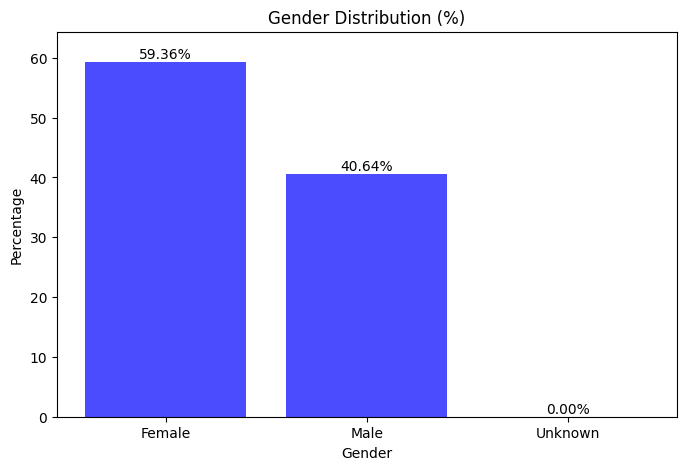

In [12]:
# Count occurrences of each gender
gender_counts = df['Patient Bio Gender Translated'].value_counts()

# Convert counts to percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100

plt.figure(figsize=(8, 5))
plt.bar(gender_percentages.index, gender_percentages.values, color=['blue'], alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution (%)')

# Show percentages on bars with higher precision for small values
for i, v in enumerate(gender_percentages.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)  # More decimal places

# Adjust y-axis for better visibility
plt.ylim(0, max(gender_percentages.values) + 5)  # Dynamic y-axis scaling
plt.show()

### Top 5 Procedures

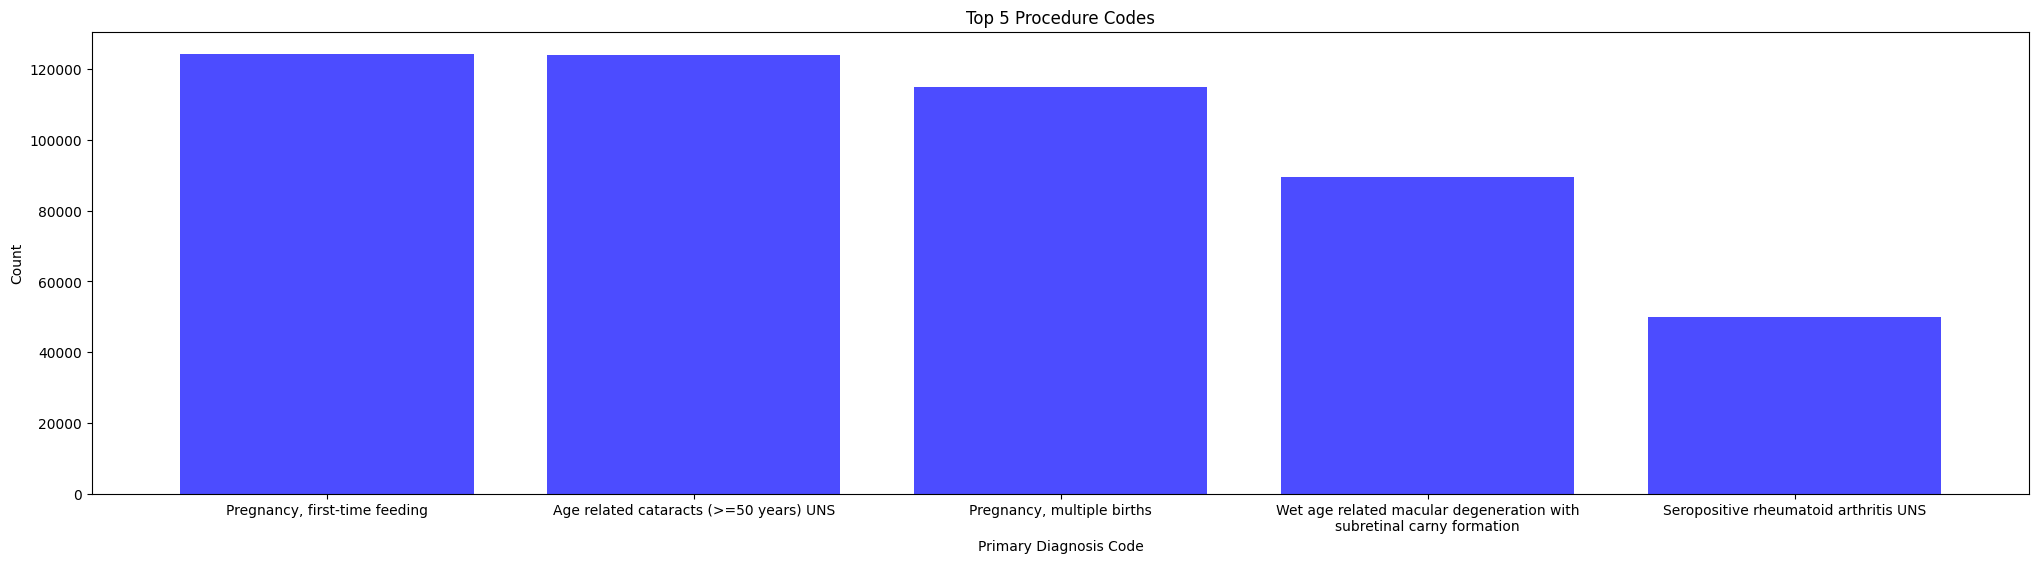

In [13]:
# Procedure types
procedure_counts = df['Primary Diagnosis Code'].value_counts().head(5)

# MATCHING PROCEDURE CODES WITH THEIR DESCRIPTIONS
procedure_counts = procedure_counts.reset_index()
procedure_counts.columns = ['Primary Diagnosis Code', 'Count']
procedure_counts['Description'] = procedure_counts['Primary Diagnosis Code'].map(
	lambda x: diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x]['Primary Diagnosis Text'].values[0] 
	if not diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x].empty else 'Unknown'
)
procedure_counts['Description Translated'] = procedure_counts['Primary Diagnosis Code'].map(
	lambda x: diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x]['Primary Diagnosis Text Translated'].values[0] 
	if not diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x].empty else 'Unknown' )

# Wrap long text into two lines
procedure_counts['Description Translated'] = procedure_counts['Description Translated'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=50)))

plt.figure(figsize=(25, 6))
plt.bar(procedure_counts['Description Translated'], procedure_counts['Count'], color='blue', alpha=0.7)
plt.xlabel('Primary Diagnosis Code')
plt.ylabel('Count')
plt.title('Top 5 Procedure Codes')
plt.show()

### Top Departments with Most Outpatient Activities

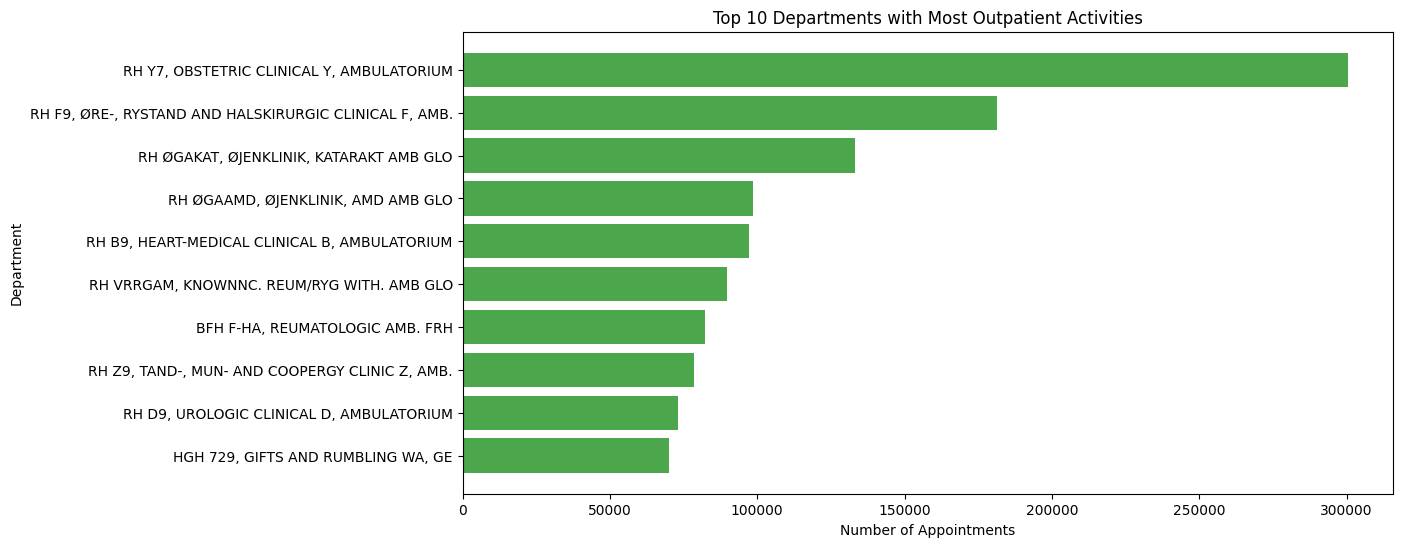

In [14]:
# Count outpatient activities per department
top_departments = df['Responsible Treatment Department Translated'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_departments.index, top_departments.values, color='green', alpha=0.7)
plt.xlabel('Number of Appointments')
plt.ylabel('Department')
plt.title('Top 10 Departments with Most Outpatient Activities')

plt.gca().invert_yaxis()  # To display highest count at the top
plt.show()


Since top procedures and departments are related to pregnancy which is a good thing, we will remove it

In [15]:
# Defining the list of pregnancy-related diagnosis codes
pregnancy_codes = ['RH Y7, OBSTETRIC CLINICAL Y, AMBULATORIUM']

# Remove rows with pregnancy-related diagnosis codes
df = df[~df['Responsible Treatment Department Translated'].isin(pregnancy_codes)]

# Display the updated dataframe
df

Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
6863      Z4030762       1301023084574                                  0   
6864      Z4056993       1301023289336                                  0   
6865      Z4066021       1301023486523                                  0   
6866      Z4098041       1301022818412                                  0   
6867      Z4108696       1301027209839                                  0   
...            ...                 ...                                ...   
2276111   Z3240475       1301027392577                                  5   
2276112   Z3240475       1301027392577                                  5   
2276113   Z3240475       1301027392577                                  5   
2276114   Z3240475       1301027392577                                  5   
2276115   Z3240475       1301027392577                                  5   

         Contact Start Date    Contact End Date     Contact Type  \
6863    2023-02-07 09:18:00 2023-02-07 10:00:00  Fysisk fremmøde   
6864    2023-01-26 10:50:00 2023-01-26 11:20:00  Fysisk fremmøde   
6865    2023-03-10 08:25:00 2023-03-10 09:00:00  Fysisk fremmøde   
6866    2023-01-04 10:19:00 2023-01-04 13:30:00  Fysisk fremmøde   
6867    2023-10-18 09:56:00 2023-10-18 10:30:00  Fysisk fremmøde   
...                     ...                 ...              ...   
2276111 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276112 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276113 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276114 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276115 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
6863            Planlagt           2 Ambulant                  DZ001   
6864            Planlagt           2 Ambulant                  DZ001   
6865            Planlagt           2 Ambulant                  DZ001   
6866            Planlagt           2 Ambulant                  DZ001   
6867            Planlagt           2 Ambulant                  DZ001   
...                  ...                  ...                    ...   
2276111         Planlagt     4 Ambulant Us/Op                 DK222B   
2276112         Planlagt     4 Ambulant Us/Op                 DK222B   
2276113         Planlagt     4 Ambulant Us/Op                 DK222B   
2276114         Planlagt     4 Ambulant Us/Op                 DK222B   
2276115         Planlagt     4 Ambulant Us/Op                 DK222B   

        Secondary Diagnosis Code  ... Patient Marital Status Translated  \
6863                         NaN  ...                            Single   
6864                         NaN  ...                            Single   
6865                         NaN  ...                            Single   
6866                         NaN  ...                            Single   
6867                         NaN  ...                            Single   
...                          ...  ...                               ...   
2276111                    DT286  ...                            Single   
2276112                    DT286  ...                            Single   
2276113                    DT286  ...                            Single   
2276114                    DT286  ...                            Single   
2276115                    DT286  ...                            Single   

        Patient Created on My SP (Y/N) Translated Patient Country Translated  \
6863                                            J                    Denmark   
6864                                            N                    Denmark   
6865                                            N                    Denmark   
6866                                            J                    Denmark   
6867                                            J                    Denmark   
...                 

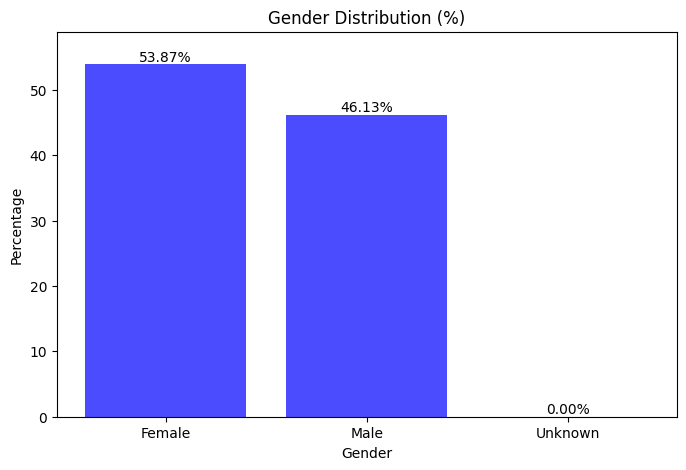

In [16]:
# Count occurrences of each gender
gender_counts = df['Patient Bio Gender Translated'].value_counts()

# Convert counts to percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100

plt.figure(figsize=(8, 5))
plt.bar(gender_percentages.index, gender_percentages.values, color=['blue'], alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution (%)')

# Show percentages on bars with higher precision for small values
for i, v in enumerate(gender_percentages.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)  # More decimal places

# Adjust y-axis for better visibility
plt.ylim(0, max(gender_percentages.values) + 5)  # Dynamic y-axis scaling
plt.show()

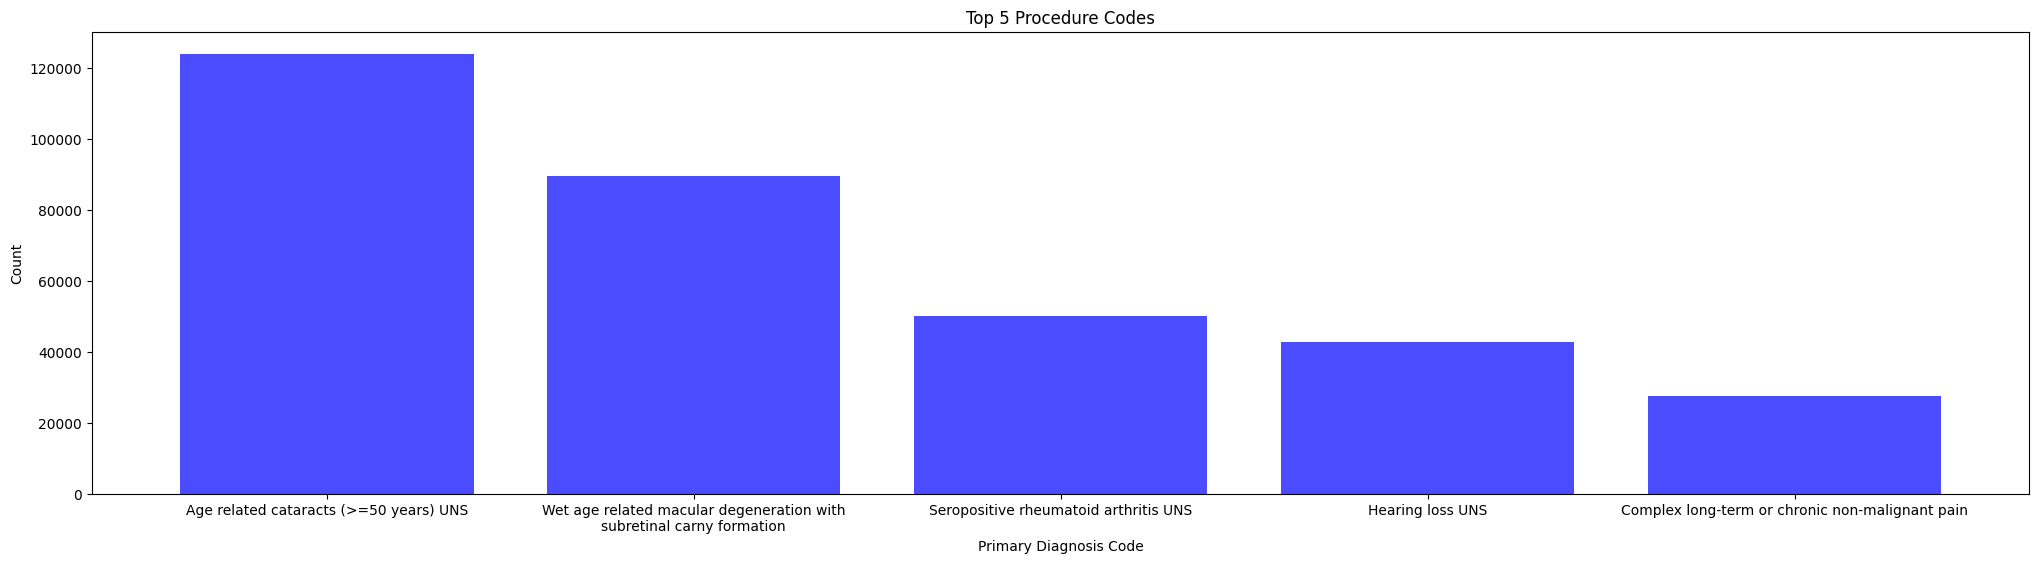

In [17]:
# Procedure types
procedure_counts = df['Primary Diagnosis Code'].value_counts().head(5)

# MATCHING PROCEDURE CODES WITH THEIR DESCRIPTIONS
procedure_counts = procedure_counts.reset_index()
procedure_counts.columns = ['Primary Diagnosis Code', 'Count']
procedure_counts['Description'] = procedure_counts['Primary Diagnosis Code'].map(
	lambda x: diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x]['Primary Diagnosis Text'].values[0] 
	if not diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x].empty else 'Unknown'
)
procedure_counts['Description Translated'] = procedure_counts['Primary Diagnosis Code'].map(
	lambda x: diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x]['Primary Diagnosis Text Translated'].values[0] 
	if not diagnosis_data[diagnosis_data['Primary Diagnosis Code'] == x].empty else 'Unknown' )

# Wrap long text into two lines
procedure_counts['Description Translated'] = procedure_counts['Description Translated'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=50)))

plt.figure(figsize=(25, 6))
plt.bar(procedure_counts['Description Translated'], procedure_counts['Count'], color='blue', alpha=0.7)
plt.xlabel('Primary Diagnosis Code')
plt.ylabel('Count')
plt.title('Top 5 Procedure Codes')
plt.show()

### Appointment Types Distribution

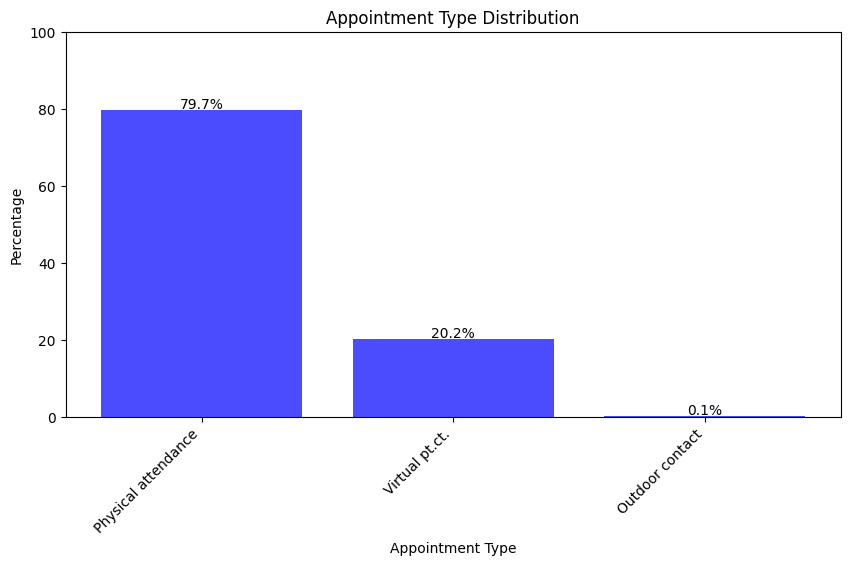

In [18]:
# Count occurrences of each appointment type
appointment_counts = df['Contact Type Translated'].value_counts()

# Convert counts to percentages
appointment_percentages = (appointment_counts / appointment_counts.sum()) * 100

# Plot
plt.figure(figsize=(10, 5))
plt.bar(appointment_percentages.index, appointment_percentages.values, color='blue', alpha=0.7)
plt.xlabel('Appointment Type')
plt.ylabel('Percentage')
plt.title('Appointment Type Distribution')

# Show percentages on bars
for i, v in enumerate(appointment_percentages.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.show()

### Total Appointments per Patient (Distribution Analysis)

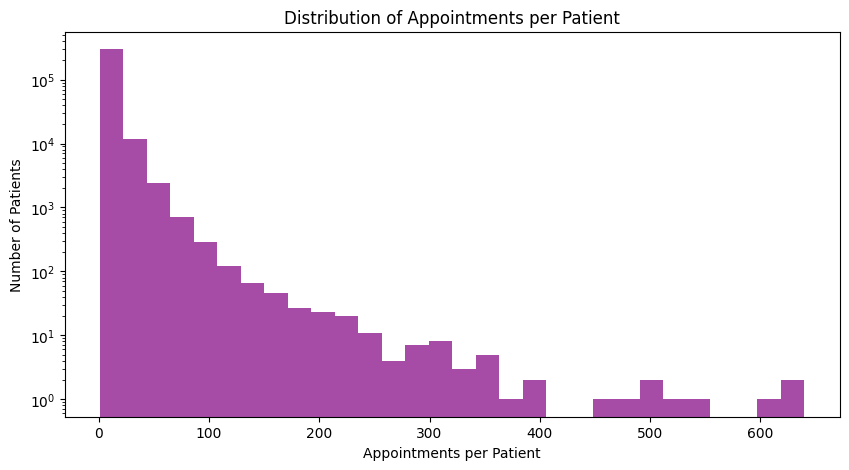

In [19]:
# Count appointments per patient
appointments_per_patient = df['Patient ID'].value_counts()

# Plot histogram to see distribution
plt.figure(figsize=(10, 5))
plt.hist(appointments_per_patient, bins=30, color='purple', alpha=0.7)
plt.xlabel('Appointments per Patient')
plt.ylabel('Number of Patients')
plt.title('Distribution of Appointments per Patient')
plt.yscale('log')  # Log scale to show the long tail effect
plt.show()

### Identify Top 10% of Patients with Most Appointments

In [20]:
# Find the top 10% threshold
top_10_percent_threshold = np.percentile(appointments_per_patient, 90)

# Get patients in the top 10%
top_10_percent_patients = appointments_per_patient[appointments_per_patient >= top_10_percent_threshold].index

# Subset data for these patients
top_patients_data = df[df['Patient ID'].isin(top_10_percent_patients)]

### Compare Top 10% Patients vs. General Population
#### Age distribution

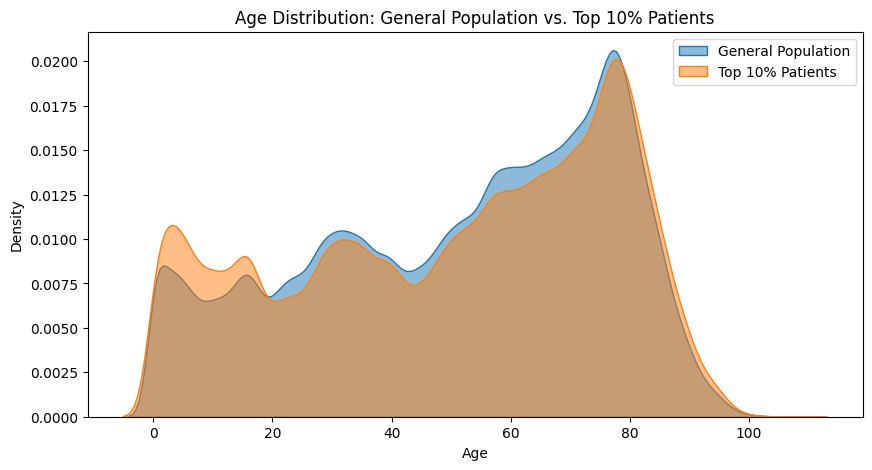

In [21]:
# General Population vs. High-Utilizers (Top 10% of patients)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Patient Age at Contact Start Time', label='General Population', fill=True, alpha=0.5)
sns.kdeplot(data=top_patients_data, x='Patient Age at Contact Start Time', label='Top 10% Patients', fill=True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution: General Population vs. Top 10% Patients')
plt.legend()
plt.show()

#### Gender distribution

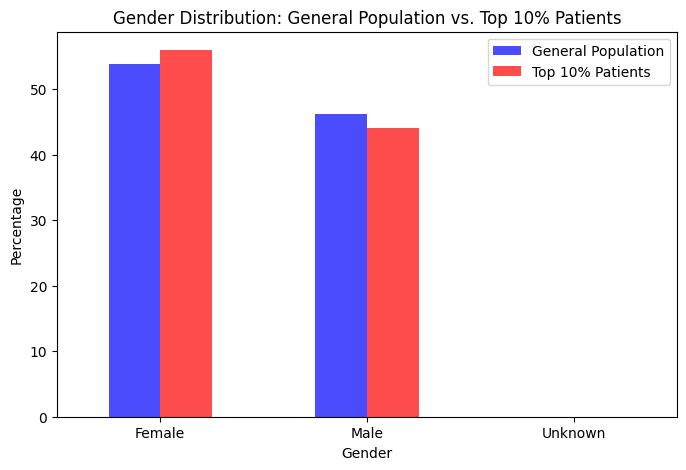

In [22]:
# Gender distribution for both groups
general_gender_dist = df['Patient Bio Gender Translated'].value_counts(normalize=True) * 100
top_gender_dist = top_patients_data['Patient Bio Gender Translated'].value_counts(normalize=True) * 100

# Create a dataframe for comparison
gender_comparison = pd.DataFrame({'General Population': general_gender_dist, 'Top 10% Patients': top_gender_dist}).fillna(0)

# Plot
gender_comparison.plot(kind='bar', figsize=(8, 5), color=['blue', 'red'], alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution: General Population vs. Top 10% Patients')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### Appointment durations

Converting the dates to datetime so it can be handled and calculating the average meeting duration of all appointments.

In [23]:
# Calculate duration in minutes
df['Duration (minutes)'] = (df['Contact End Date'] - df['Contact Start Date']).dt.total_seconds() / 60

# Calculate average duration
average_duration = df['Duration (minutes)'].mean()


print(f"Average call duration: {average_duration:.2f} minutes")

Average call duration: 94.23 minutes


Histogram to see how many appointments are spanding over x amount of days

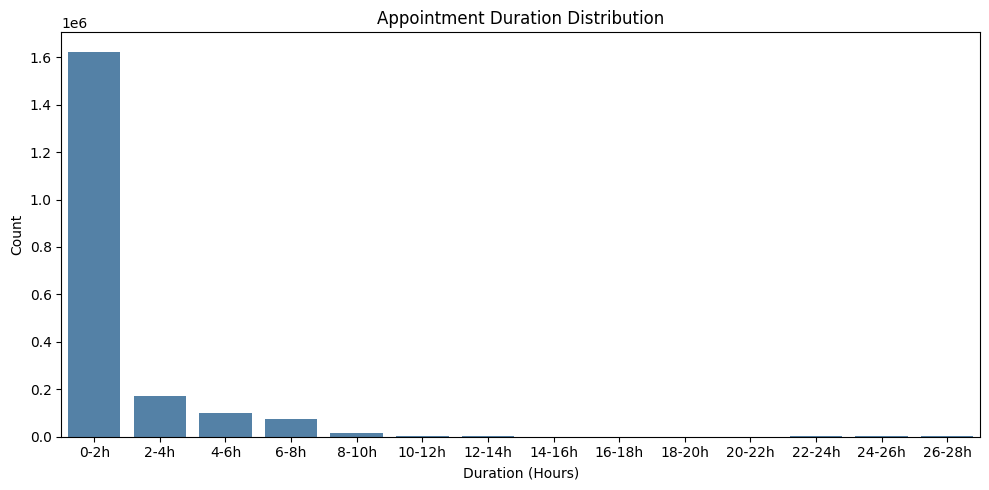

In [24]:
# Calculate duration in hours
duration_hours = (df['Contact End Date'] - df['Contact Start Date']).dt.total_seconds() / 3600

# Define custom bins (you can adjust the range as needed)
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h', '10-12h', '12-14h', '14-16h', '16-18h', '18-20h', '20-22h', '22-24h', '24-26h', '26-28h']

# Bin the durations
df['Duration Category'] = pd.cut(duration_hours, bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Duration Category', color='steelblue')
plt.title('Appointment Duration Distribution')
plt.xlabel('Duration (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Mean duration of consultation that is only in one day

In [25]:
duration = df['Duration (minutes)']
print(duration[duration < 24*60].mean())  # Average duration in minutes for calls less than 24 hours

89.23625472448852


Very close to the same average so there can only be very few, very long consultations.

Group average meeting duration by the start time of the day.

1994594


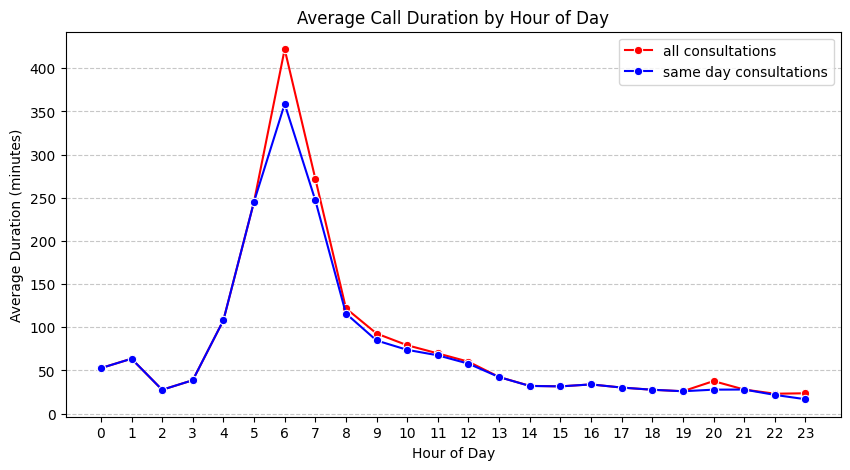

In [26]:
df['Hour of Day'] = df['Contact Start Date'].dt.hour

# group by hour of day
average_by_hour = df.groupby('Hour of Day')['Duration (minutes)'].mean().reset_index()

# filter data to only include one day consultations
one_day_data = df[df['Contact Start Date'].dt.date == df['Contact End Date'].dt.date]

average_by_hour_day = one_day_data.groupby('Hour of Day')['Duration (minutes)'].mean().reset_index()
print(len(one_day_data))
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_by_hour, x='Hour of Day', y='Duration (minutes)', color='red', marker='o', label = "all consultations")
sns.lineplot(data=average_by_hour_day, x='Hour of Day', y='Duration (minutes)', color='blue', marker='o', label = "same day consultations")
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Call Duration by Hour of Day')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that in both 1 day consultaion and all consultation, there is a trend that most consultations starting outside "normal" business hours tend to be way longer. Probably due to them being urgent instead of normal consultations.

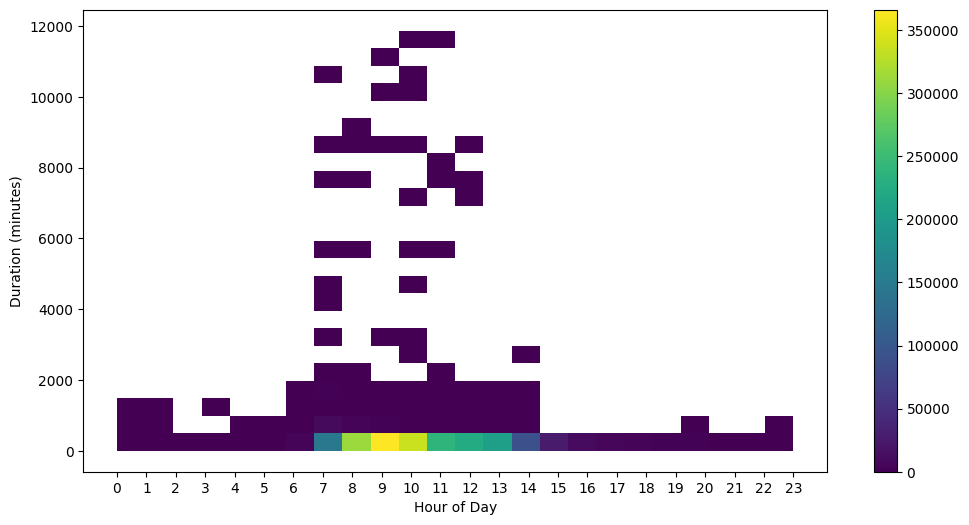

In [27]:
# histogram of duration per hour of day
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hour of Day', y='Duration (minutes)', bins=24, cmap='viridis', cbar=True)
plt.xlabel('Hour of Day')
plt.xticks(range(24))
plt.show()

## Physical vs Virtual Consultations

In [28]:
virtual_appointments = df['Contact Type Translated'].str.contains('Virtual', case=False, na=False)
physical_appointments = df['Contact Type Translated'].str.contains('Physical', case=False, na=False)
virtual_appointments_df = df[virtual_appointments]
physical_appointments_df = df[physical_appointments]

virtual_appointments_df

Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
6915      Z3618692       1301026671749                                  3   
6916      Z3618693       1301025774546                                  3   
6918      Z3853127       1301029418398                                 25   
6919       Z396413       1301030144977                                 14   
6920      Z4137790       1301031030302                                 25   
...            ...                 ...                                ...   
2275883   Z3534157       1301028503661                                 30   
2275884   Z3543911       1301027569181                                 30   
2275885   Z3546271       1301026003366                                 10   
2275886   Z3596672       1301023608473                                  3   
2275887   Z3596672       1301027554584                                  3   

         Contact Start Date    Contact End Date    Contact Type  \
6915    2023-09-13 11:55:00 2023-09-13 13:00:00  Virtuel pt.kt.   
6916    2023-07-14 08:05:00 2023-07-14 11:00:00  Virtuel pt.kt.   
6918    2024-05-08 16:39:00 2024-05-08 16:54:00  Virtuel pt.kt.   
6919    2024-08-13 14:48:00 2024-08-13 14:58:00  Virtuel pt.kt.   
6920    2024-10-09 14:44:00 2024-10-09 14:59:00  Virtuel pt.kt.   
...                     ...                 ...             ...   
2275883 2024-02-07 12:04:00 2024-02-07 12:34:00  Virtuel pt.kt.   
2275884 2023-11-13 11:05:00 2023-11-13 11:35:00  Virtuel pt.kt.   
2275885 2023-07-28 09:39:00 2023-07-28 10:09:00  Virtuel pt.kt.   
2275886 2023-02-14 12:38:00 2023-02-14 13:08:00  Virtuel pt.kt.   
2275887 2023-11-10 13:26:00 2023-11-10 13:56:00  Virtuel pt.kt.   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
6915            Planlagt           2 Ambulant                  DC910   
6916            Planlagt           2 Ambulant                  DC910   
6918            Planlagt           2 Ambulant                 DS381C   
6919            Planlagt           2 Ambulant                  DM217   
6920            Planlagt           2 Ambulant                  DM751   
...                  ...                  ...                    ...   
2275883         Planlagt           2 Ambulant                  DN974   
2275884         Planlagt           2 Ambulant                  DN974   
2275885         Planlagt           2 Ambulant                  DD699   
2275886         Planlagt           2 Ambulant                  DH905   
2275887         Planlagt           2 Ambulant                  DH905   

        Secondary Diagnosis Code  ... Patient Region Translated  \
6915                         NaN  ...              Capital (84)   
6916                         NaN  ...              Capital (84)   
6918                         NaN  ...              Capital (84)   
6919                         NaN  ...              Capital (84)   
6920                         NaN  ...              Capital (84)   
...                          ...  ...                       ...   
2275883                    DN809  ...              Capital (84)   
2275884                    DZ312  ...              Capital (84)   
2275885                   DR040C  ...              Capital (84)   
2275886                    DZ011  ...              Capital (84)   
2275887                    DZ011  ...              Capital (84)   

        Patient Municipality Translated  \
6915                         Copenhagen   
6916                         Copenhagen   
6918                         Copenhagen   
6919                         Copenhagen   
6920                         Copenhagen   
...                                 ...   
2275883                      Copenhagen   
2275884                      Copenhagen   
2275885                      Copenhagen   
2275886                      Copenhagen   
2275887                      Copenhagen   

                                  Primary Diagnosis Text  \
6915                     Akut l

In [31]:
physical_appointments_df


Patient ID  Patient Contact ID  Patient Age at Contact Start Time  \
6863      Z4030762       1301023084574                                  0   
6864      Z4056993       1301023289336                                  0   
6865      Z4066021       1301023486523                                  0   
6866      Z4098041       1301022818412                                  0   
6867      Z4108696       1301027209839                                  0   
...            ...                 ...                                ...   
2276111   Z3240475       1301027392577                                  5   
2276112   Z3240475       1301027392577                                  5   
2276113   Z3240475       1301027392577                                  5   
2276114   Z3240475       1301027392577                                  5   
2276115   Z3240475       1301027392577                                  5   

         Contact Start Date    Contact End Date     Contact Type  \
6863    2023-02-07 09:18:00 2023-02-07 10:00:00  Fysisk fremmøde   
6864    2023-01-26 10:50:00 2023-01-26 11:20:00  Fysisk fremmøde   
6865    2023-03-10 08:25:00 2023-03-10 09:00:00  Fysisk fremmøde   
6866    2023-01-04 10:19:00 2023-01-04 13:30:00  Fysisk fremmøde   
6867    2023-10-18 09:56:00 2023-10-18 10:30:00  Fysisk fremmøde   
...                     ...                 ...              ...   
2276111 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276112 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276113 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276114 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   
2276115 2023-11-23 09:05:00 2023-11-23 11:43:00  Fysisk fremmøde   

        Admission Method Patient Contact Type Primary Diagnosis Code  \
6863            Planlagt           2 Ambulant                  DZ001   
6864            Planlagt           2 Ambulant                  DZ001   
6865            Planlagt           2 Ambulant                  DZ001   
6866            Planlagt           2 Ambulant                  DZ001   
6867            Planlagt           2 Ambulant                  DZ001   
...                  ...                  ...                    ...   
2276111         Planlagt     4 Ambulant Us/Op                 DK222B   
2276112         Planlagt     4 Ambulant Us/Op                 DK222B   
2276113         Planlagt     4 Ambulant Us/Op                 DK222B   
2276114         Planlagt     4 Ambulant Us/Op                 DK222B   
2276115         Planlagt     4 Ambulant Us/Op                 DK222B   

        Secondary Diagnosis Code  ... Patient Region Translated  \
6863                         NaN  ...              Capital (84)   
6864                         NaN  ...              Capital (84)   
6865                         NaN  ...              Capital (84)   
6866                         NaN  ...              Capital (84)   
6867                         NaN  ...              Capital (84)   
...                          ...  ...                       ...   
2276111                    DT286  ...              Capital (84)   
2276112                    DT286  ...              Capital (84)   
2276113                    DT286  ...              Capital (84)   
2276114                    DT286  ...              Capital (84)   
2276115                    DT286  ...              Capital (84)   

        Patient Municipality Translated  \
6863                         Copenhagen   
6864                         Copenhagen   
6865                         Copenhagen   
6866                         Copenhagen   
6867                         Copenhagen   
...                                 ...   
2276111                      Copenhagen   
2276112                      Copenhagen   
2276113                      Copenhagen   
2276114                      Copenhagen   
2276115                      Copenhagen   

                                  Primary Diagnosis Text  \
6863     Kontakt mh

### Top 20 of Virtual Visits Type

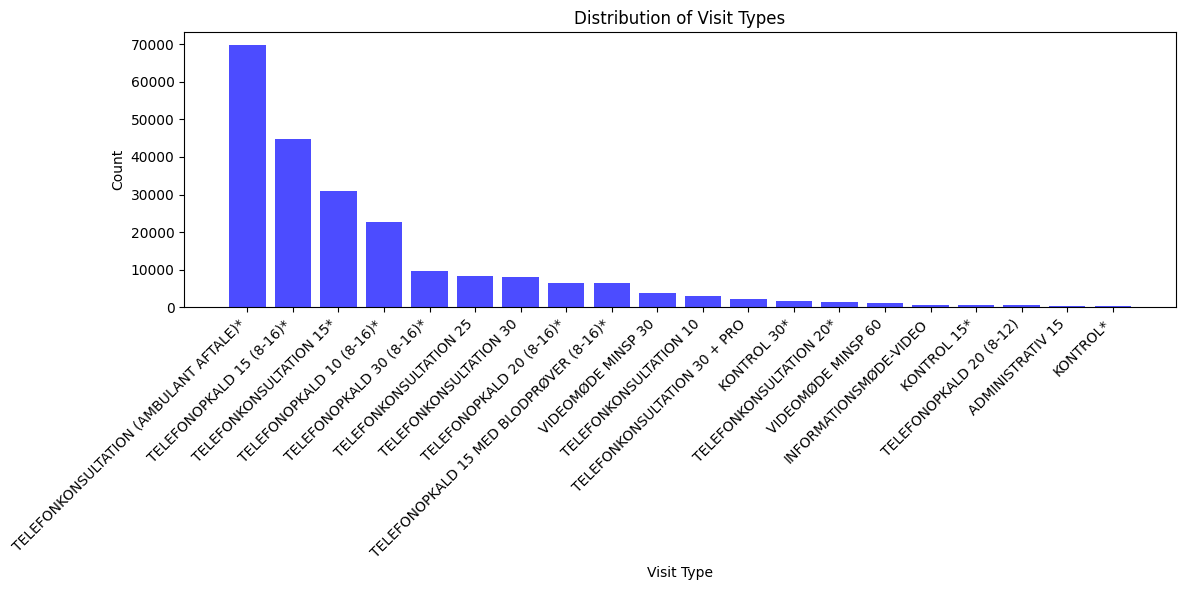

In [29]:
# Count occurrences of each visit type
visit_type_counts = virtual_appointments_df['Visit Type'].value_counts()

# Keep only the top 20 visit types so its visually user friendly
top_20_visit_types = visit_type_counts.head(20)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_20_visit_types.index, top_20_visit_types.values, color='blue', alpha=0.7)
plt.xlabel('Visit Type')
plt.ylabel('Count')
plt.title('Distribution of Visit Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Mean and Standard Deviation of Appointment Durations by Type

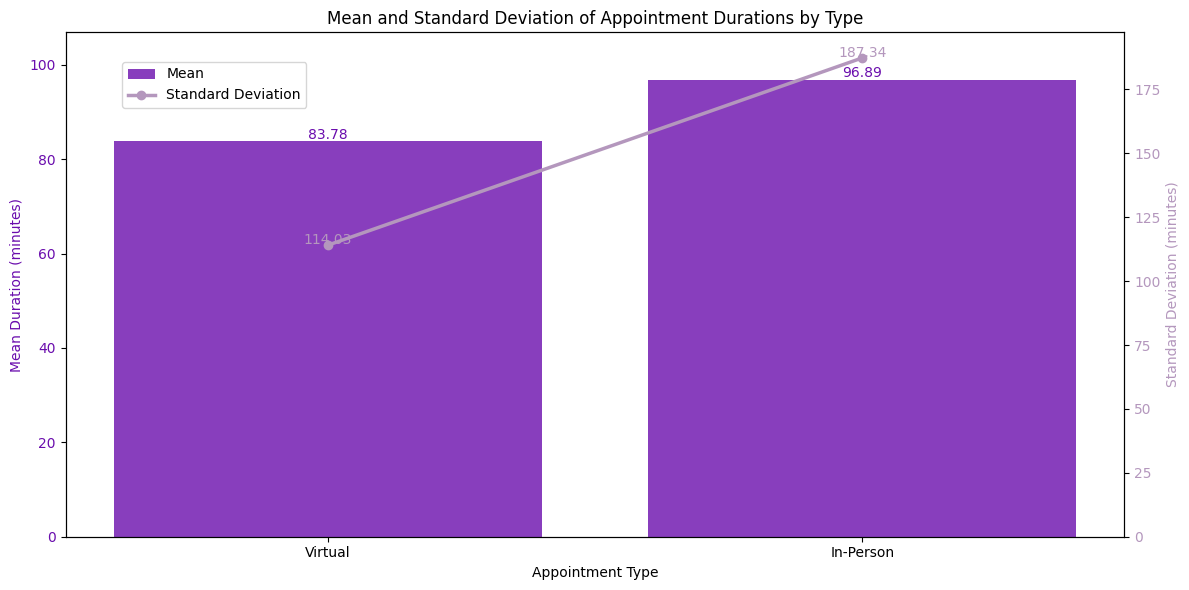

In [30]:
# Combine virtual and physical appointments into one DataFrame
virtual_appointments_df['Appointment Type'] = 'Virtual'
physical_appointments_df['Appointment Type'] = 'In-Person'
combined_appointments_df = pd.concat([virtual_appointments_df, physical_appointments_df])

# Calculate mean and standard deviation for each appointment type
mean_std_duration = combined_appointments_df.groupby('Appointment Type')['Duration (minutes)'].agg(['mean', 'std']).reset_index()

# Ensure "Virtual" is on the left and "In-Person" is on the right
mean_std_duration = mean_std_duration.set_index('Appointment Type').loc[['Virtual', 'In-Person']].reset_index()

# Plot the mean and standard deviation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean 
# Plot mean
ax1.bar(mean_std_duration['Appointment Type'], mean_std_duration['mean'], color='#6A0DAD', alpha=0.8, label='Mean')  # Deep Purple
ax1.set_xlabel('Appointment Type')
ax1.set_ylabel('Mean Duration (minutes)', color='#6A0DAD')
ax1.tick_params(axis='y', labelcolor='#6A0DAD')
ax1.set_ylim(0, mean_std_duration['mean'].max() + 10)

# Add mean values on bars
for i, v in enumerate(mean_std_duration['mean']):
    ax1.text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=10, color='#6A0DAD')

# Create a second y-axis for standard deviation
ax2 = ax1.twinx()
ax2.plot(mean_std_duration['Appointment Type'], mean_std_duration['std'],
         color='#B497BD', marker='o', linestyle='-', linewidth=2.5, label='Standard Deviation')  # Lavender Gray
ax2.set_ylabel('Standard Deviation (minutes)', color='#B497BD')
ax2.tick_params(axis='y', labelcolor='#B497BD')
ax2.set_ylim(0, mean_std_duration['std'].max() + 10)

# Add standard deviation values on the line plot
for i, v in enumerate(mean_std_duration['std']):
    ax2.text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=10, color='#B497BD')


# Add title and legend
plt.title('Mean and Standard Deviation of Appointment Durations by Type')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

### Intersection of Visit Types between Physical and Virtual Appointments

In [31]:
# Check if physical_appointments_df and virtual_appointments_df have the same "Visit Types"
physical_visit_types = set(physical_appointments_df['Visit Type'].unique())
virtual_visit_types = set(virtual_appointments_df['Visit Type'].unique())

# Compare the visit types
common_visit_types = physical_visit_types.intersection(virtual_visit_types)
only_in_physical = physical_visit_types - virtual_visit_types
only_in_virtual = virtual_visit_types - physical_visit_types

print("Common Visit Types:", common_visit_types)
print("Visit Types only in Physical Appointments:", only_in_physical)
print("Visit Types only in Virtual Appointments:", only_in_virtual)

Common Visit Types: {'KONTROL FYSIOTERAPEUT 30', 'PCD', 'FORUNDERSØGELSE', 'KONTROL 12 MDR. ABLATIONSKONTROL 30', 'TRANSPERINEALE BIOPSIER 45', 'UNDERSØGELSE KORT', 'VACCINATION', 'SLUT 1', 'SYGEPLEJERSKE 15', 'NY PATIENT FYSIOTERAPEUT', 'UNDERSØGELSE*', 'SYGEPLEJERSKE 30 + RUM*', 'ABR/ASSR SVAR', 'AVT', 'DAGHOSPITALSPATIENT SPL 20', 'AKUT VURDERING 60', 'SYGEPLEJERSKE 20', 'UROTERAPEUT KONTROL', 'ADOLECENS', 'TILSYN 30', 'FABRY 30', 'PATIENTSAMTALE 60', 'ØJENFOTO VOKSNE', 'KONTROL 90 BFH AUAM*', 'KONTROL*', 'KONTROL 15*', 'NY PATIENT 60*', 'FORUNDERSØGELSE IUI 60', 'NY SAMTALE 60 RH4071', 'SKLERODERMI 2. BESØG FØR LÆGE 20', 'FAMILIESYGEPLEJE SAMTALE', 'SYGEPLEJERSKE 60', 'FORUNDERSØGELSE 30*', 'KONTROL SPECIALLÆGE 30 + RUM*', 'AKUT', 'SYGEPLEJERSKE 45', 'KONTROL TRANSITION 30', 'JOURNALOPTAG 60', 'EKKO NY - BØRN-ARVELIGE SYGDOM', 'NY PATIENT SOCIALRÅDGIVER', 'INSTITUTIONSBESØG 60', 'SCS 30', 'PROTETIK 2. AFTRYK*', 'SAMTALE 60', 'KONTROL EMBO', 'EKKOKARDIOGRAFI - GUCH', 'NY PATIENT 120

### Age Distribution: Virtual vs. In-Person Appointments

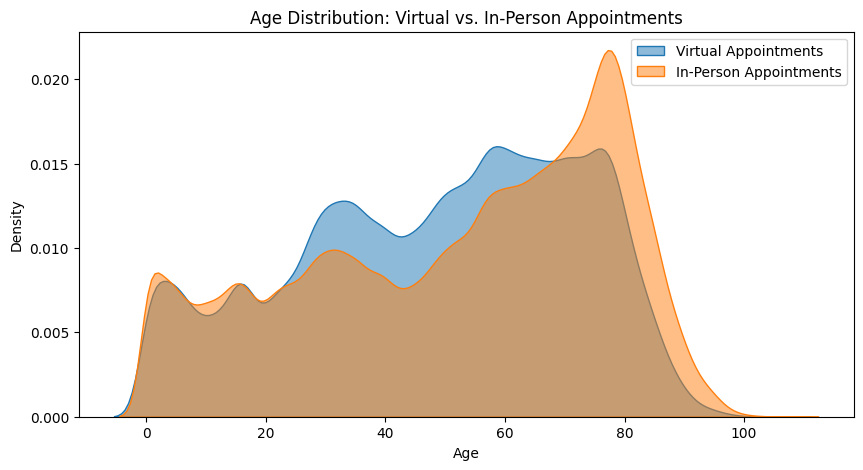

In [32]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=virtual_appointments_df, x='Patient Age at Contact Start Time', label='Virtual Appointments', fill=True, alpha=0.5)
sns.kdeplot(data=physical_appointments_df, x='Patient Age at Contact Start Time', label='In-Person Appointments', fill=True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution: Virtual vs. In-Person Appointments')
plt.legend()
plt.show()

### Location analysis

In [33]:
# Initialize geolocator
geolocator = Nominatim(user_agent="denmark_postal_code_locator")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Get unique postal codes and their counts
postal_code_counts = virtual_appointments_df['Patient Postal Code'].value_counts()

# Create a DataFrame for postal codes and their counts
postal_code_df = pd.DataFrame({'Postal Code': postal_code_counts.index, 'Count': postal_code_counts.values})

# Get latitude and longitude for each postal code
postal_code_df['Location'] = postal_code_df['Postal Code'].apply(lambda x: geocode(f"{x}, Denmark"))
postal_code_df['Latitude'] = postal_code_df['Location'].apply(lambda loc: loc.latitude if loc else None)
postal_code_df['Longitude'] = postal_code_df['Location'].apply(lambda loc: loc.longitude if loc else None)

# Filter out rows with missing coordinates
postal_code_df = postal_code_df.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered around Denmark
denmark_map = folium.Map(location=[56.26392, 9.501785], zoom_start=7)

KeyboardInterrupt: 

In [ ]:
# Keep only rows where 'Postal Code' contains only digits
postal_code_df = postal_code_df[postal_code_df['Postal Code'].astype(str).str.isdigit()]

# Aggregate counts by postal code
postal_code_df = postal_code_df.groupby('Postal Code').agg(
    {'Count': 'sum', 
     'Latitude': 'first', 
     'Longitude': 'first',
     }).reset_index()

postal_code_df

Postal Code  Count   Latitude  Longitude
0           1051     85  55.679985  12.590608
1           1052     83  55.678865  12.590148
2           1053     37  55.678014  12.590737
3           1054     81  55.677999  12.588839
4           1055     82  55.678056  12.587689
...          ...    ...        ...        ...
1411        9940      4  57.287982  11.014563
1412        9981      3  57.526086  10.436171
1413         999     12  35.456277 -97.743158
1414        9990     10  57.720866  10.562238
1415        9999     82  43.970728 -70.803530

[1416 rows x 4 columns]

### Appointments outside of Denmark

In [ ]:
# Define Denmark's rough bounding box
min_lat, max_lat = 54.5, 58.0
min_lon, max_lon = 7.5, 15.5

# Filter rows outside this bounding box
outside_denmark = postal_code_df[
    (postal_code_df['Latitude'] < min_lat) | (postal_code_df['Latitude'] > max_lat) |
    (postal_code_df['Longitude'] < min_lon) | (postal_code_df['Longitude'] > max_lon)
]

# Print the postal codes that fall outside of Denmark
print("Postal codes outside of Danish territory:")
print(outside_denmark['Postal Code'].tolist())

Postal codes outside of Danish territory:
[9999, '000', '0000', '00000', '0100', '0380', '100', '1000', '10117', '101300', '105', '108', '10969', '11240', '1405', '14163', '1530', '160', '16761', '17264', '175', '180', '190', '201369', '20259', '20600', '21176', '21370', '21573', '21582', '21584', '21755', '21840', '220', '2207343', '22110', '22135', '22391', '22647', '23155', '23194', '23196', '23537', '23538', '23554', '23637', '23835', '23836', '23840', '240', '24372', '24395', '24431', '24532', '24750', '24770', '24790', '24937', '24955', '26213', '26452', '26691', '26695', '26771', '270', '27060', '27355', '28027', '28141', '28491', '2860045', '28793', '29156', '29680', '31252', '31785', '335', '33904', '350', '360', '370', '37440', '380', '3900', '3910', '3911', '3912', '3919', '3920', '3921', '3922', '3950', '3951', '3953', '3955', '3961', '3962', '3963', '400', '40714', '41318', '420', '430', '435', '438', '440', '450', '460', '46569', '470', '478', '480', '490', '512', '513', 

________

In [ ]:
# Step 1: Log-transform the consultation counts
postal_code_df['Log Count'] = np.log1p(postal_code_df['Count'])

# Step 2: Sort so higher values appear on top
sorted_df = postal_code_df.sort_values(by='Count')

# Step 3: Create color scale
min_val = sorted_df['Log Count'].min()
max_val = sorted_df['Log Count'].max()

colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],
    vmin=min_val,
    vmax=max_val
)
colormap.caption = "Log-scaled number of consultations"

# Step 4: Create map
denmark_map = folium.Map(location=[56.26392, 9.501785], zoom_start=7)

# Step 5: Add circles with smaller fixed size
for _, row in sorted_df.iterrows():
    count = row['Count']
    log_count = row['Log Count']

    if pd.notna(log_count):
        folium.Circle(
            location=[row['Latitude'], row['Longitude']],
            radius=4000,  
            color=None,
            fill=True,
            fill_color=colormap(log_count),
            fill_opacity=0.5,
            popup=(
                f"<b>Postal Code:</b> {row['Postal Code']}<br>"
                f"<b>Consultations:</b> {int(count)}"
            )
        ).add_to(denmark_map)

# Step 6: Add color legend
colormap.add_to(denmark_map)
denmark_map

In [ ]:
population_df = pd.read_excel("Postal code.xlsx")

In [ ]:
# Clean the Postal Code column to keep only the part after " - "
population_df['Postal Code Cleaned'] = population_df['Postal Code'].str.split(' - ').str[-1]

# Clean the Postal Code column to keep only the part after " - "
population_df['Postal Code Number'] = population_df['Postal Code Cleaned'].str.split(' ').str[0]

# Preview the result
print(population_df[['Postal Code', 'Postal Code Cleaned', 'Postal Code Number']].head())

                        Postal Code Postal Code Cleaned Postal Code Number
0  101 København - 1050 København K    1050 København K               1050
1  101 København - 1051 København K    1051 København K               1051
2  101 København - 1052 København K    1052 København K               1052
3  101 København - 1053 København K    1053 København K               1053
4  101 København - 1054 København K    1054 København K               1054


In [ ]:
# aggregate the data by Postal Code Number and sum the Population column
population_df = population_df.groupby('Postal Code Number')['Population'].sum().reset_index()
population_df

Postal Code Number  Population
0                  1050          20
1                  1051         404
2                  1052         403
3                  1053         314
4                  1054         431
...                 ...         ...
1057               9970        2453
1058               9981         916
1059               9982        1758
1060               9990        7634
1061               9999       12110

[1062 rows x 2 columns]

In [ ]:
postal_population_code_df = postal_code_df.merge(
    population_df,
    left_on='Postal Code',
    right_on='Postal Code Number',
    how='left'
)
postal_population_code_df

Postal Code  Count   Latitude  Longitude  Log Count Postal Code Number  \
0           1051     85  55.679985  12.590608   4.454347                NaN   
1           1052     83  55.678865  12.590148   4.430817                NaN   
2           1053     37  55.678014  12.590737   3.637586                NaN   
3           1054     81  55.677999  12.588839   4.406719                NaN   
4           1055     82  55.678056  12.587689   4.418841                NaN   
...          ...    ...        ...        ...        ...                ...   
1411        9940      4  57.287982  11.014563   1.609438               9940   
1412        9981      3  57.526086  10.436171   1.386294               9981   
1413         999     12  35.456277 -97.743158   2.564949                NaN   
1414        9990     10  57.720866  10.562238   2.397895               9990   
1415        9999     82  43.970728 -70.803530   4.418841               9999   

      Population  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1411      1765.0  
1412       916.0  
1413         NaN  
1414      7634.0  
1415     12110.0  

[1416 rows x 7 columns]

In [44]:
# Step 1: Calculate consultations per 1,000 people
postal_population_code_df['Rate_per_1000'] = (
    postal_population_code_df['Count'] / postal_population_code_df['Population']
) * 1000
postal_population_code_df['Rate_per_1000'] = postal_population_code_df['Rate_per_1000'].round(2)

# Step 2: Use fixed color scale range (safe defaults)
vmin = 0
vmax = 200 

colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],
    vmin=vmin,
    vmax=vmax
)
colormap.caption = "Consultations per 1,000 citizens"

# Step 3: Sort to draw higher values last (red on top)
sorted_df = postal_population_code_df.sort_values(by='Rate_per_1000')

# Step 4: Create the map
denmark_map = folium.Map(location=[56.26392, 9.501785], zoom_start=7)

# Step 5: Add markers
for _, row in sorted_df.iterrows():
    rate = row['Rate_per_1000']
    if pd.notna(rate):
        rate_clamped = min(max(rate, vmin), vmax)  # clamp to color scale range
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=None,
            fill=True,
            fill_color=colormap(rate_clamped),
            fill_opacity=0.5,
            popup=(
                f"<b>Postal Code:</b> {row['Postal Code Number']}<br>"
                f"<b>Consultations per 1,000:</b> {rate:.2f}<br>"
                f"<b>Total Consultations:</b> {int(row['Count'])}<br>"
                f"<b>Population:</b> {int(row['Population'])}"
            )
        ).add_to(denmark_map)

# Step 6: Add legend
colormap.add_to(denmark_map)
denmark_map

In [ ]:
# Count occurrences of each visit type
visit_type_counts = virtual_appointments_df['Visit Type'].value_counts()

# Convert to list of tuples
visit_type_list = list(visit_type_counts.items())

# Display the list
visit_type_list

# Display the list in a scrollable format

html = "<div style='height: 200px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>"
html += "<ul>"
for item in visit_type_list:
    html += f"<li>{item[0]}: {item[1]}</li>"
html += "</ul></div>"

display(HTML(html))

In [ ]:
# Count occurrences of each visit type
visit_type_counts_in_person = physical_appointments_df['Visit Type'].value_counts()

# Convert to list of tuples
visit_type_list_in_person = list(visit_type_counts_in_person.items())

# Display the list
visit_type_list_in_person

# Display the list in a scrollable format

html = "<div style='height: 200px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>"
html += "<ul>"
for item in visit_type_list_in_person:
    html += f"<li>{item[0]}: {item[1]}</li>"
html += "</ul></div>"

display(HTML(html))

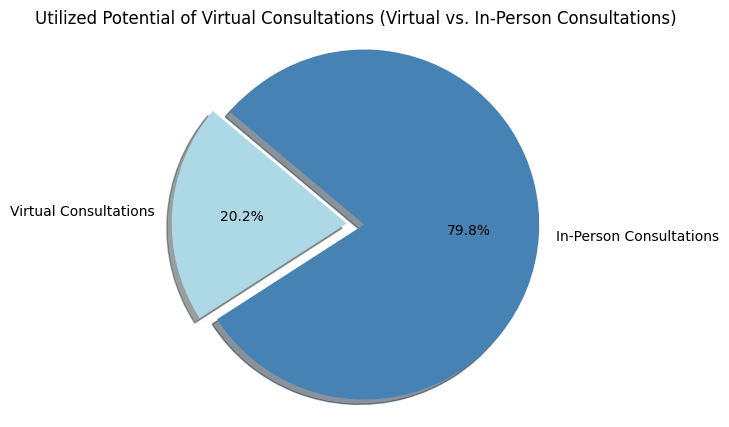

In [ ]:
# Calculate the counts of virtual and physical consultations
virtual_counts = virtual_appointments_df.shape[0]
physical_counts = physical_appointments_df.shape[0]

# Calculate the proportion of virtual consultations
proportion_virtual = virtual_counts / (virtual_counts + physical_counts)

# Create a pie chart to visualize the proportions
labels = ['Virtual Consultations', 'In-Person Consultations']
sizes = [proportion_virtual, 1 - proportion_virtual]
colors = ['#ADD8E6', '#4682B4']  # Updated colors: light blue and steel blue
explode = (0.1, 0)  # explode the first slice (i.e. 'Virtual Consultations')

plt.figure(figsize=(8, 5))
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct=lambda p: f'{p:.1f}%', 
    textprops={'color': 'black'},  # Make text black
    shadow=True, 
    startangle=140
)
plt.title('Utilized Potential of Virtual Consultations (Virtual vs. In-Person Consultations)', color='black')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [50]:
# Step 1: Calculate 'Proportion Virtual'
postal_code_df['Proportion Virtual'] = postal_code_df['Count'] / (postal_code_df['Count'].sum())

# Step 2: Create colormap
colormap = cm.LinearColormap(['blue', 'green', 'yellow', 'red'], vmin=0, vmax=1)
colormap.caption = "Andel virtuelle konsultationer"

# Step 3: Sort data so low proportions (blue) are drawn first
sorted_df = postal_code_df.sort_values(by='Proportion Virtual')

# Step 3: Create map
denmark_map_circles = folium.Map(location=[56.26392, 9.501785], zoom_start=7)

# Step 4: Calculate postal_code_totals
postal_code_totals = postal_code_df.set_index('Postal Code')['Count'].to_dict()

# Draw cleaner, smaller circles
for _, row in sorted_df.iterrows():
    proportion = row['Proportion Virtual']
    if pd.notna(proportion):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  
            color=None,  
            fill=True,
            fill_color=colormap(proportion),
            fill_opacity=0.5,
            popup=(
                f"<b>Postnummer:</b> {row['Postal Code']}<br>"
                f"<b>Andel virtuelle:</b> {proportion:.2%}<br>"
                f"<b>Antal patienter:</b> {int(postal_code_totals.get(row['Postal Code'], 0))}"
            )
        ).add_to(denmark_map_circles)

# Step 5: Add legend
colormap.add_to(denmark_map_circles)
denmark_map_circles

In [51]:
# Set up a continuous color scale 
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], vmin=0, vmax=1)
colormap.caption = "Utilized Potential of Virtual Consultations"

# Create the map
denmark_map = folium.Map(location=[56.26392, 9.501785], zoom_start=7)

# Add styled circle markers
for _, row in postal_code_df.iterrows():
    proportion = row['Proportion Virtual']
    if pd.notna(proportion):
        folium.Circle(
            location=[row['Latitude'], row['Longitude']],
            radius=3500,  
            color=None,
            fill=True,
            fill_color=colormap(proportion),
            fill_opacity=0.6 
        ).add_to(denmark_map)

# Add the color legend
colormap.add_to(denmark_map)
denmark_map

In [36]:
print(virtual_appointments_df['Contact Type Translated'].value_counts())

Contact Type Translated
Virtual pt.ct.    404352
Name: count, dtype: int64


## Clustering 

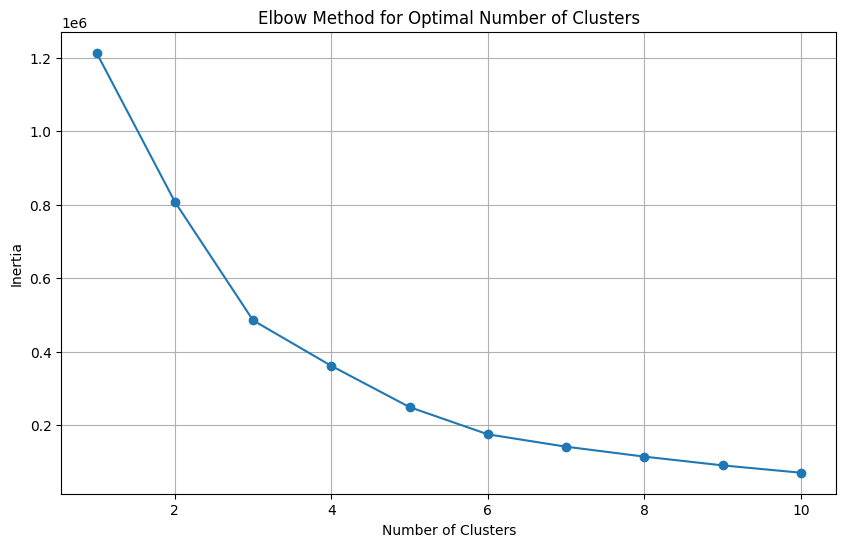

In [77]:
#cluster the different types of patients for the current virtual visits
# Select relevant columns for clustering
features = virtual_appointments_df[['Patient Age at Contact Start Time', 'Patient Region Translated', 'Patient Bio Gender Translated']].copy()

region_mapping = dict(enumerate(features['Patient Region Translated'].astype('category').cat.categories))
gender_mapping = dict(enumerate(features['Patient Bio Gender Translated'].astype('category').cat.categories))

# Convert categories to numeric codes
features['Patient Region Translated'] = features['Patient Region Translated'].astype('category').cat.codes
features['Patient Bio Gender Translated'] = features['Patient Bio Gender Translated'].astype('category').cat.codes

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply elbow method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [78]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
features['Cluster'] = kmeans.labels_
features['Cluster'] = features['Cluster'].astype('category')
features['Cluster'] = features['Cluster'].cat.rename_categories(['Cluster 0', 'Cluster 1', 'Cluster 2'])
# Calculate silhouette score
silhouette_avg = silhouette_score(features_scaled, features['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.50


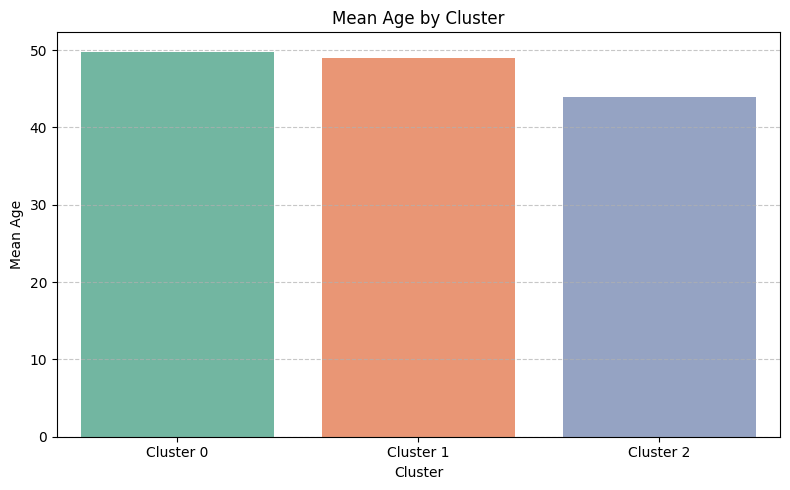

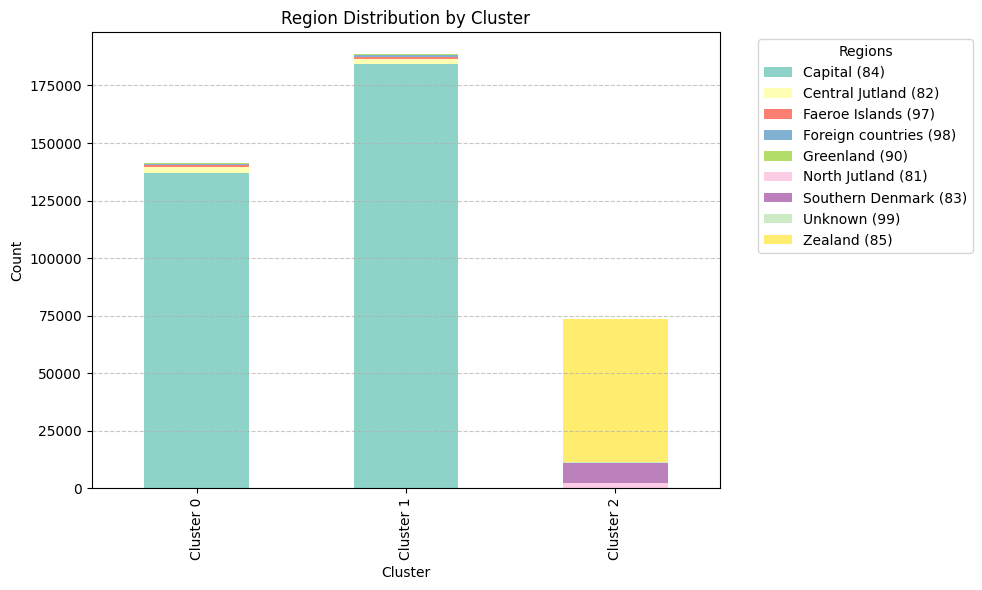

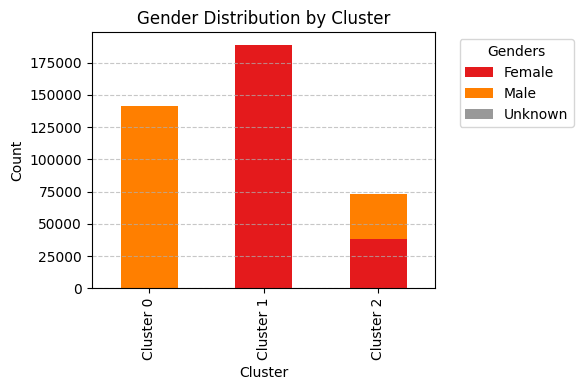

In [80]:
# Plot the mean values of each feature for each cluster
# Numerical feature: 'Patient Age at Contact Start Time'
plt.figure(figsize=(8, 5))
age_means = features.groupby('Cluster')['Patient Age at Contact Start Time'].mean()
sns.barplot(x=age_means.index, y=age_means.values, palette='Set2')
plt.title('Mean Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Categorical feature: 'Patient Region Translated'
region_counts = features.groupby('Cluster')['Patient Region Translated'].value_counts().unstack(fill_value=0)

# Only use keys that exist in the mapping
region_counts = region_counts[[col for col in region_counts.columns if col in region_mapping]]
region_labels = [region_mapping[col] for col in region_counts.columns]

region_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Region Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(region_labels, title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Categorical feature: 'Patient Bio Gender Translated'
gender_counts = features.groupby('Cluster')['Patient Bio Gender Translated'].value_counts().unstack(fill_value=0)

gender_counts = gender_counts[[col for col in gender_counts.columns if col in gender_mapping]]
gender_labels = [gender_mapping[col] for col in gender_counts.columns]

gender_counts.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set1')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(gender_labels, title="Genders", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Clusters of Virtual Appointments')

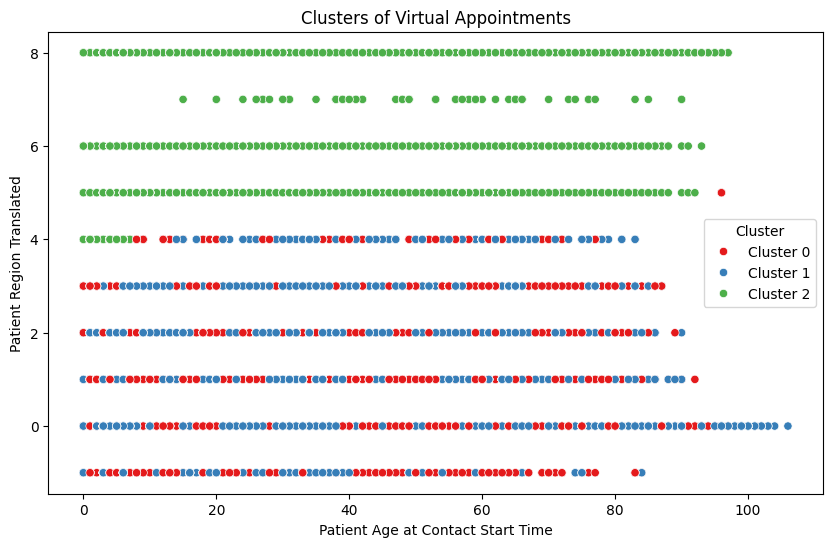

In [65]:
#plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='Patient Age at Contact Start Time', y='Patient Region Translated', hue='Cluster', palette='Set1')
plt.title('Clusters of Virtual Appointments')

In [67]:
# Prepare data for clustering
df_cluster = df.copy()

# Rename for consistency
df_cluster = df_cluster.rename(columns={
    'Patient Age at Contact Start Time': 'Patient Age',
    #'Admission Method Translated': 'Admission Method',
    'Responsible Treatment Department Translated': 'Department',
    #'Visit Type Translated': 'Visit Type',
    'Contact Duration (hours)': 'Duration'
})

df_cluster = df_cluster.drop(columns=['Admission Method Translated', 'Visit Type Translated'])

In [68]:
print(df_cluster.columns)

Index(['Patient ID', 'Patient Contact ID', 'Patient Age', 'Contact Start Date',
       'Contact End Date', 'Contact Type', 'Admission Method',
       'Patient Contact Type', 'Primary Diagnosis Code',
       'Secondary Diagnosis Code', 'Responsible Treatment Department',
       'Duration', 'Procedure Performed', 'Treatment Contact ID', 'Visit Type',
       'Patient Postal Code', 'Contact Type Translated',
       'Patient Contact Type Translated', 'Department',
       'Patient Bio Gender Translated', 'Patient Marital Status Translated',
       'Patient Created on My SP (Y/N) Translated',
       'Patient Country Translated', 'Patient Region Translated',
       'Patient Municipality Translated', 'Primary Diagnosis Text', 'Group 3',
       'Group 2', 'Group 1', 'Primary Diagnosis Text Translated',
       'Duration (minutes)', 'Duration Category', 'Hour of Day'],
      dtype='object')


In [72]:
# Features
features = ['Duration', 'Patient Age', 'Visit Type', 'Department', 'Contact Type Translated']

# Preprocessing (dense output for PCA or further use)
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Duration', 'Patient Age']),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), ['Visit Type', 'Department', 'Contact Type Translated'])
])

# Replace commas with periods in numerical columns (if they are strings)
if df_cluster['Duration'].dtype == 'object':
    df_cluster['Duration'] = df_cluster['Duration'].str.replace(',', '.').astype(float)
# Ensure 'Patient Age' is numeric (if needed)
# if df_cluster['Patient Age'].dtype == 'object':
#     df_cluster['Patient Age'] = df_cluster['Patient Age'].str.replace(',', '.').astype(float)

# Preprocess features
X_preprocessed = preprocessor.fit_transform(df_cluster[features])

# Try different values of k and store inertia
inertias = []
k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_preprocessed)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 14.9 GiB for an array with shape (2001831, 1000) and data type float64

In [ ]:
# Reuse your preprocessed data
X_preprocessed = preprocessor.fit_transform(df_cluster[features])

# Final KMeans clustering with chosen k
k = 5
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans_final.fit_predict(X_preprocessed)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Plot PCA projection with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['Cluster'], palette='tab10', s=50)
plt.title('Consultation Clusters (PCA Projection, k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
summary_num = df_cluster.groupby('Cluster')[['Duration', 'Patient Age']].mean().round(2)
print(summary_num)

In [ ]:
# Relative frequency of Visit Types in each cluster
visit_type_dist = df_cluster.groupby('Cluster')['Visit Type'].value_counts(normalize=True).unstack(fill_value=0).round(2)

# Same for Department
department_dist = df_cluster.groupby('Cluster')['Department'].value_counts(normalize=True).unstack(fill_value=0).round(2)

# And Admission Category


admission_dist = df_cluster.groupby('Cluster')['Admission Category'].value_counts(normalize=True).unstack(fill_value=0).round(2)

In [ ]:
cluster_summary = summary_num.copy()
cluster_summary['Most Common Visit Type'] = df_cluster.groupby('Cluster')['Visit Type'].agg(lambda x: x.mode().iloc[0])
cluster_summary['Most Common Department'] = df_cluster.groupby('Cluster')['Department'].agg(lambda x: x.mode().iloc[0])
cluster_summary['Admission Type (Mode)'] = df_cluster.groupby('Cluster')['Admission Category'].agg(lambda x: x.mode().iloc[0])

if 'Is Virtual' in df_cluster.columns:
    cluster_summary['% Virtual'] = df_cluster.groupby('Cluster')['Is Virtual'].mean().round(2) * 100

print(cluster_summary)